In [1]:
# ---- 1) Imports ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from RespiratoryWaveformEstimation.respWaveformEstimator import RespWaveformEstimator

# s

In [2]:
# read the accelerometer data
accel_data = pd.read_csv("G:\Shared drives\PhD\speckled\RespAccel\sample_data\s3_respeck_lyingBack_breathingNormal.csv",
                         usecols=['timestamp', 'accel_x', 'accel_y', 'accel_z'])

# Take every other row (e.g., from 25 Hz → 12.5 Hz)
accel_data_resampled = accel_data.iloc[::2].reset_index(drop=True)
accel_data

,timestamp,accel_x,accel_y,accel_z
0,1697605965,-0.854248,-0.160217,0.563171
1,1697606005,-0.848877,-0.164856,0.564880
2,1697606045,-0.849854,-0.163391,0.568542
3,1697606085,-0.844238,-0.163391,0.568054
4,1697606125,-0.857422,-0.168518,0.573425
...,...,...,...,...
759,1697636325,-0.848389,-0.170959,0.572449
760,1697636365,-0.850342,-0.167542,0.557556
761,1697636405,-0.847168,-0.165588,0.558044
762,1697636445,-0.851562,-0.167053,0.564148


In [3]:
accel_values = accel_data_resampled[['accel_x', 'accel_y', 'accel_z']].to_numpy()
accel_values

array([[-0.85424805, -0.16021729,  0.5631714 ],
       [-0.8498535 , -0.16339111,  0.5685425 ],
       [-0.8574219 , -0.16851807,  0.5734253 ],
       ...,
       [-0.8552246 , -0.16265869,  0.5726929 ],
       [-0.8503418 , -0.1675415 ,  0.55755615],
       [-0.8515625 , -0.16705322,  0.56414795]])

In [4]:
FS = 12.5 # Sampling frequency in Hz

# ---- Create an instance of the RespWaveformEstimator ----
est = RespWaveformEstimator(sampling_freq=FS, window_size=100, angle_threshold=5e-3)

In [5]:
# ---- Estimate the respiratory waveform ----
resp_wave = est.estimateRespWaveform(accel_values)

AttributeError: 'RespWaveformEstimator' object has no attribute 'estimateRespWaveform'

In [ ]:
# Build time axis
t = np.arange(len(resp_wave)) / 12.5  # seconds

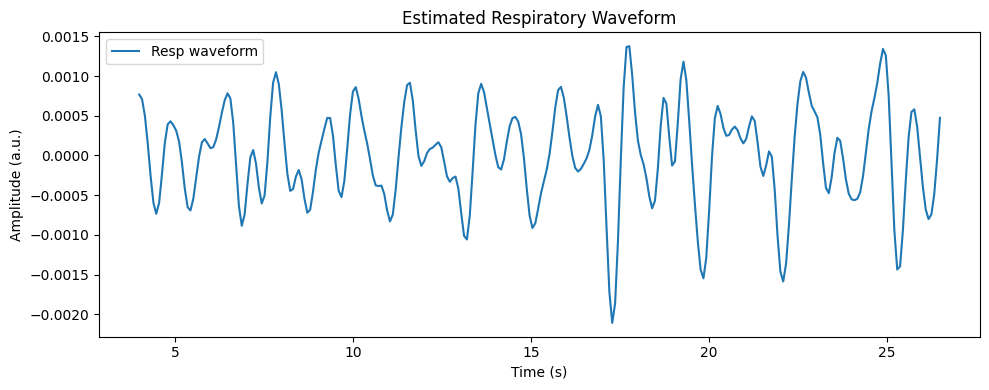

In [ ]:
# 5) Plot — this will automatically skip NaN segments
plt.figure(figsize=(10, 4))
plt.plot(t[50:-50], resp_wave[50:-50], label="Resp waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.title("Estimated Respiratory Waveform")
plt.legend()
plt.tight_layout()
plt.show()

# d

In [2]:
# read the accelerometer data
accel_data = pd.read_csv(r"G:\Shared drives\PhD\speckled\RespAccel\sample_data\test_breathing.csv",
                         usecols=['interpolatedPhoneTimestamp', 'breathingSignal', 'x', 'y', 'z'])

In [3]:
accel_data

,interpolatedPhoneTimestamp,breathingSignal,x,y,z
0,1.739892e+12,-0.485910,-1.141661,-0.167257,0.928962
1,1.739892e+12,-0.526840,-1.161551,-0.203421,0.855869
2,1.739892e+12,-0.548923,-1.176066,-0.226023,0.823331
3,1.739892e+12,-0.514230,-1.174453,-0.244105,0.768629
4,1.739892e+12,-0.419906,-1.185742,-0.266255,0.764856
...,...,...,...,...,...
827,1.739892e+12,-0.438071,-1.225523,0.095835,1.116175
828,1.739892e+12,-0.400785,-1.236813,0.093122,1.109101
829,1.739892e+12,-0.361322,-1.228211,0.099451,1.117590
830,1.739892e+12,-0.310417,-1.222298,0.095383,1.115232


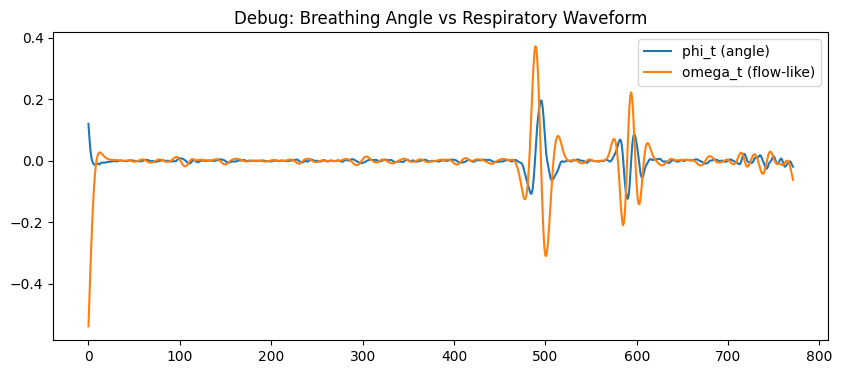

In [4]:
accel_values = accel_data[['x', 'y', 'z']].to_numpy()
FS = 12.5 # Sampling frequency in Hz

# ---- Create an instance of the RespWaveformEstimator ----
est = RespWaveformEstimator(sampling_freq=FS, window_size=750, angle_threshold = 0.015)

# ---- Estimate the respiratory waveform ----
resp_wave = est.estimateRespWaveform(accel_values)

# Build time axis
t = np.arange(len(resp_wave)) / 12.5  # seconds

In [5]:
breathingSignal = accel_data['breathingSignal'].to_numpy()

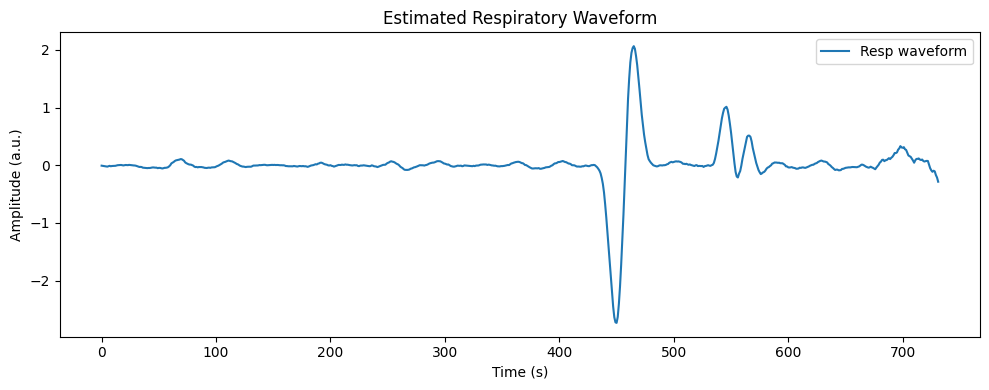

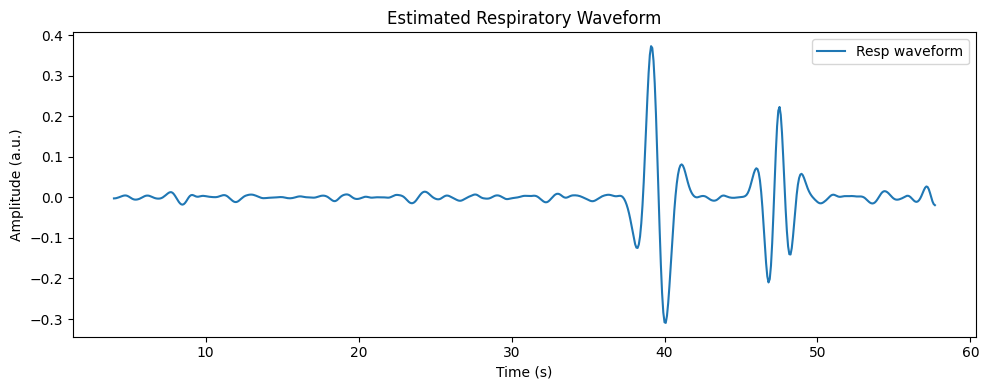

In [7]:
# 5) Plot — this will automatically skip NaN segments
plt.figure(figsize=(10, 4))
plt.plot(breathingSignal[50:-50], label="Resp waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.title("Estimated Respiratory Waveform")
plt.legend()
plt.tight_layout()
plt.show()

# 5) Plot — this will automatically skip NaN segments
plt.figure(figsize=(10, 4))
plt.plot(t[50:-50], resp_wave[50:-50], label="Resp waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.title("Estimated Respiratory Waveform")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from RespiratoryWaveformEstimation.respeck_breathing import RespeckBreathing